In [3]:
import pandas as pd
# from statsmodels.tsa.arima.model import ARIMA
import numpy as np
import matplotlib.pyplot as plt

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [4]:
import keras

In [2]:
# df = pd.read_csv(r'C:\Users\mengh\plotly dash covid app\COVID-dashboard\datasetformapping.csv')

In [3]:
# df.head()

,Unnamed: 0,Country/Region,ObservationDate,Confirmed,Deaths,Recovered,iso_code
0,78471,Thailand,2020-01-22,4.0,0.0,2.0,THA
1,16249,China,2020-01-22,0.0,0.0,0.0,CHN
2,41237,Kiribati,2020-01-22,0.0,0.0,0.0,KIR
3,77142,Taiwan,2020-01-22,1.0,0.0,0.0,TWN
4,81684,US,2020-01-22,1.0,0.0,0.0,NaN


In [4]:
# df_predict = df[df['Country/Region'] == 'US']

In [58]:
# df_predict['daily_confirmed'] = df_predict['Confirmed'].diff()

In [59]:
# df_predict['daily_confirmed'] = df_predict['daily_confirmed'].fillna(1)

In [60]:
# df_predict.head()

,Unnamed: 0,Country/Region,ObservationDate,Confirmed,Deaths,Recovered,iso_code,daily_confirmed
4,81684.0,US,2020-01-22,1.0,0.0,0.0,NaN,1.0
20,81686.0,US,2020-01-23,1.0,0.0,0.0,NaN,0.0
35,81688.0,US,2020-01-24,2.0,0.0,0.0,NaN,1.0
49,81690.0,US,2020-01-25,2.0,0.0,0.0,NaN,0.0
65,81692.0,US,2020-01-26,5.0,0.0,0.0,NaN,3.0


In [37]:
# df_predict = df_predict.sort_values('ObservationDate')

In [61]:
# y = df_predict['daily_confirmed'].values

In [22]:
# y

array([1.0000000e+00, 1.0000000e+00, 2.0000000e+00, 2.0000000e+00,
       5.0000000e+00, 5.0000000e+00, 5.0000000e+00, 5.0000000e+00,
       5.0000000e+00, 6.0000000e+00, 8.0000000e+00, 8.0000000e+00,
       1.1000000e+01, 1.1000000e+01, 1.2000000e+01, 1.2000000e+01,
       1.2000000e+01, 1.2000000e+01, 1.2000000e+01, 1.2000000e+01,
       1.3000000e+01, 1.3000000e+01, 1.5000000e+01, 1.5000000e+01,
       1.5000000e+01, 1.5000000e+01, 1.5000000e+01, 1.5000000e+01,
       1.5000000e+01, 1.5000000e+01, 3.5000000e+01, 3.5000000e+01,
       3.5000000e+01, 5.3000000e+01, 5.3000000e+01, 5.9000000e+01,
       6.0000000e+01, 6.2000000e+01, 7.0000000e+01, 7.6000000e+01,
       1.0100000e+02, 1.2200000e+02, 1.5300000e+02, 2.2100000e+02,
       2.7800000e+02, 4.1700000e+02, 5.3700000e+02, 6.0500000e+02,
       9.5900000e+02, 1.2810000e+03, 1.6630000e+03, 2.1790000e+03,
       2.7260000e+03, 3.4990000e+03, 4.6320000e+03, 6.4210000e+03,
       7.7860000e+03, 1.3680000e+04, 1.9101000e+04, 2.5514000e

In [62]:
# model = ARIMA(y[:-14], order=(1,0,0))

In [34]:
# y[:-14]

array([1.0000000e+00, 1.0000000e+00, 2.0000000e+00, 2.0000000e+00,
       5.0000000e+00, 5.0000000e+00, 5.0000000e+00, 5.0000000e+00,
       5.0000000e+00, 6.0000000e+00, 8.0000000e+00, 8.0000000e+00,
       1.1000000e+01, 1.1000000e+01, 1.2000000e+01, 1.2000000e+01,
       1.2000000e+01, 1.2000000e+01, 1.2000000e+01, 1.2000000e+01,
       1.3000000e+01, 1.3000000e+01, 1.5000000e+01, 1.5000000e+01,
       1.5000000e+01, 1.5000000e+01, 1.5000000e+01, 1.5000000e+01,
       1.5000000e+01, 1.5000000e+01, 3.5000000e+01, 3.5000000e+01,
       3.5000000e+01, 5.3000000e+01, 5.3000000e+01, 5.9000000e+01,
       6.0000000e+01, 6.2000000e+01, 7.0000000e+01, 7.6000000e+01,
       1.0100000e+02, 1.2200000e+02, 1.5300000e+02, 2.2100000e+02,
       2.7800000e+02, 4.1700000e+02, 5.3700000e+02, 6.0500000e+02,
       9.5900000e+02, 1.2810000e+03, 1.6630000e+03, 2.1790000e+03,
       2.7260000e+03, 3.4990000e+03, 4.6320000e+03, 6.4210000e+03,
       7.7860000e+03, 1.3680000e+04, 1.9101000e+04, 2.5514000e

In [63]:
# model_fit = model.fit()

In [64]:
# model_fit.predict(1,15)

array([2689.77743918, 2688.8167011 , 2689.77743918, 2688.8167011 ,
       2691.69891534, 2688.8167011 , 2688.8167011 , 2688.8167011 ,
       2688.8167011 , 2689.77743918, 2690.73817726, 2688.8167011 ,
       2691.69891534, 2688.8167011 , 2689.77743918])

In [65]:
# print(y[-14:])

[ 2.8666000e+04  2.7819000e+04  2.9293000e+04  3.0141000e+04
  2.8341000e+04  1.9778000e+04  1.2853000e+04  2.5925000e+04
  2.2756000e+04  2.4052000e+04  2.7525000e+04  2.1968000e+04
  1.1976000e+04 -3.3251939e+07]


In [10]:
df = pd.read_csv(r'C:\Users\mengh\plotly dash covid app\COVID-dashboard\datasetformapping.csv',index_col = 'ObservationDate')
df

,Unnamed: 0,Country/Region,Confirmed,Deaths,Recovered,iso_code
ObservationDate,,,,,,
2020-01-22,78471,Thailand,4.0,0.0,2.0,THA
2020-01-22,16249,China,0.0,0.0,0.0,CHN
2020-01-22,41237,Kiribati,0.0,0.0,0.0,KIR
2020-01-22,77142,Taiwan,1.0,0.0,0.0,TWN
2020-01-22,81684,US,1.0,0.0,0.0,NaN
...,...,...,...,...,...,...
2021-05-29,53499,Monaco,2503.0,32.0,2463.0,MCO
2021-05-29,61222,Papua New Guinea,15772.0,162.0,14857.0,PNG
2021-05-29,84563,Vanuatu,4.0,1.0,3.0,VUT


In [11]:
data_from_us = df[df['Country/Region'].isin(['US'])]
data_from_us

,Unnamed: 0,Country/Region,Confirmed,Deaths,Recovered,iso_code
ObservationDate,,,,,,
2020-01-22,81684,US,1.0,0.0,0.0,NaN
2020-01-23,81686,US,1.0,0.0,0.0,NaN
2020-01-24,81688,US,2.0,0.0,0.0,NaN
2020-01-25,81690,US,2.0,0.0,0.0,NaN
2020-01-26,81692,US,5.0,0.0,0.0,NaN
...,...,...,...,...,...,...
2021-05-25,81932,US,33166418.0,590941.0,0.0,NaN
2021-05-26,81934,US,33190470.0,591950.0,0.0,NaN
2021-05-27,81936,US,33217995.0,593288.0,0.0,NaN


In [12]:
data = data_from_us.groupby('ObservationDate').sum()['Confirmed']
data

ObservationDate
2020-01-22           1.0
2020-01-23           1.0
2020-01-24           2.0
2020-01-25           2.0
2020-01-26           5.0
                 ...    
2021-05-25    33166418.0
2021-05-26    33190470.0
2021-05-27    33217995.0
2021-05-28    33239963.0
2021-05-29    33251939.0
Name: Confirmed, Length: 494, dtype: float64

In [13]:
df1 = np.array(data.sort_values())
df1[:10]

array([1., 1., 2., 2., 5., 5., 5., 5., 5., 6.])

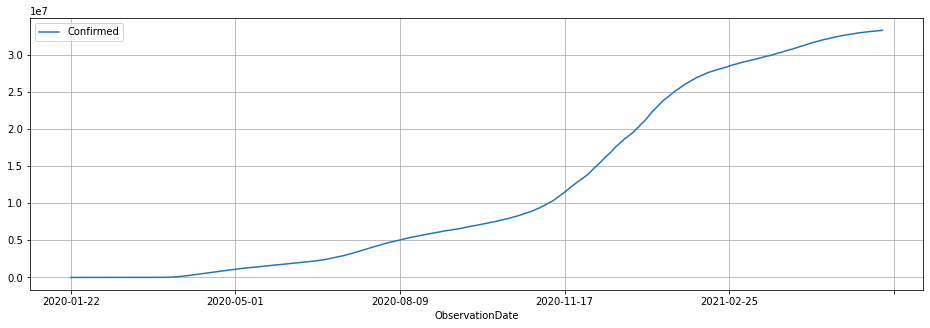

In [14]:
data_from_us['Confirmed'].plot(figsize=(16,5))

plt.legend()
plt.grid('On')
plt.show()

Normalize Data

In [17]:
scaler = StandardScaler()
# sklearn StandardScaler
# Standardize features by removing the mean and scaling to unit variance.
# z = (x - u) / s
# where u is the mean of the training samples or zero if with_mean=False, 
# and s is the standard deviation of the training samples or one if with_std=False.

dataset = scaler.fit_transform(df1.reshape(-1,1))
dataset[0]

array([-1.02253555])

Train test split

In [18]:
train_size = int(len(dataset)*0.7)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print('train shape ', train.shape)
print('test shape ', test.shape)

train shape  (345, 1)
test shape  (149, 1)


In [19]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back - 1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i+look_back,0])
    return np.array(dataX), np.array(dataY)

In [20]:
# create train and test dataset
look_back = 40

# train test split
trainX, trainY = create_dataset(train,look_back)
testX, testY = create_dataset(test, look_back)


In [21]:
# reshape input to be [samples, time steps, features]

trainX = np.reshape(trainX,(trainX.shape[0],trainX.shape[1],1))
testX = np.reshape(testX,(testX.shape[0],testX.shape[1],1))

In [23]:
batch_size = 1

In [90]:
model = Sequential()
model.add(LSTM(128, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='sgd')
for i in range(60):
    model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
    model.reset_states()

304/304 - 4s - loss: 0.0147
304/304 - 2s - loss: 0.0077
304/304 - 2s - loss: 4.9559e-04
304/304 - 2s - loss: 4.9218e-05
304/304 - 2s - loss: 2.8571e-05
304/304 - 2s - loss: 2.6661e-05
304/304 - 2s - loss: 2.6182e-05
304/304 - 2s - loss: 2.5848e-05
304/304 - 2s - loss: 2.5535e-05
304/304 - 2s - loss: 2.5232e-05
304/304 - 2s - loss: 2.4937e-05
304/304 - 2s - loss: 2.4649e-05
304/304 - 2s - loss: 2.4368e-05
304/304 - 2s - loss: 2.4095e-05
304/304 - 2s - loss: 2.3828e-05
304/304 - 2s - loss: 2.3568e-05
304/304 - 2s - loss: 2.3314e-05
304/304 - 2s - loss: 2.3067e-05
304/304 - 2s - loss: 2.2826e-05
304/304 - 2s - loss: 2.2590e-05
304/304 - 3s - loss: 2.2361e-05
304/304 - 3s - loss: 2.2137e-05
304/304 - 3s - loss: 2.1919e-05
304/304 - 3s - loss: 2.1706e-05
304/304 - 4s - loss: 2.1498e-05
304/304 - 4s - loss: 2.1295e-05
304/304 - 4s - loss: 2.1098e-05
304/304 - 4s - loss: 2.0905e-05
304/304 - 5s - loss: 2.0716e-05
304/304 - 6s - loss: 2.0533e-05
304/304 - 5s - loss: 2.0353e-05
304/304 - 5s - l

In [24]:
trainPredict = model.predict(trainX,batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX,batch_size=batch_size)

In [25]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [115]:
import math
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

train Score: 141956.97 RMSE
Test Score: 1080657.87 RMSE


In [116]:
testPredict[-9:-1]

array([[31451812.],
       [31471862.],
       [31491538.],
       [31509998.],
       [31526702.],
       [31543358.],
       [31559598.],
       [31575668.]], dtype=float32)

In [27]:
realdata = data.sort_values()
realdata[-9:-1]

ObservationDate
2021-05-21    33085106.0
2021-05-22    33104884.0
2021-05-23    33117737.0
2021-05-24    33143662.0
2021-05-25    33166418.0
2021-05-26    33190470.0
2021-05-27    33217995.0
2021-05-28    33239963.0
Name: Confirmed, dtype: float64

In [28]:
predicted_data = pd.DataFrame(testPredict, index=realdata.index[-108:])
predicted_data

,0
ObservationDate,
2021-02-11,27046560.0
2021-02-12,27143724.0
2021-02-13,27231148.0
2021-02-14,27316644.0
2021-02-15,27398958.0
...,...
2021-05-25,31526702.0
2021-05-26,31543358.0
2021-05-27,31559598.0


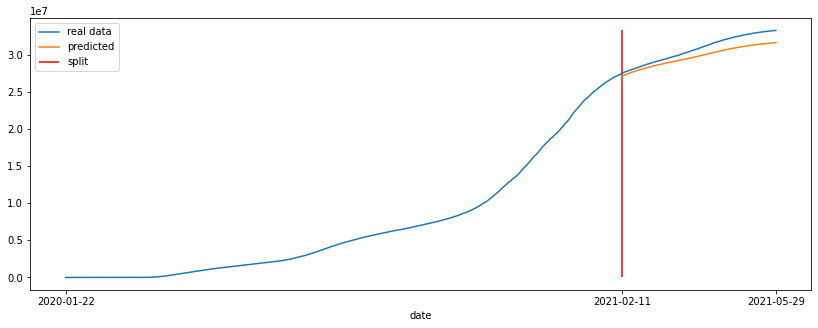

In [123]:
plt.figure(figsize=(14,5))

plt.plot(realdata, label='real data')
plt.plot(predicted_data, label='predicted')
plt.xticks([realdata.index[0], predicted_data.index[0], realdata.index[-1]])
plt.vlines(predicted_data.index[0], realdata.min(), realdata.max(), color='r', label='split')
plt.legend()
plt.xlabel('date')
plt.show()

In [124]:
testPredict.shape

(108, 1)

In [127]:
from datetime import datetime, timedelta
def future_predict(model, last_look_back_days, future_days=50):
    future_predicts = np.array([])
    dt = datetime.strptime(realdata.index[-1], '%Y-%m-%d')
    dates = np.array([])
    
    for day in range(future_days):
        dataset = scaler.fit_transform(last_look_back_days.reshape(-1,1))
        testX, testY = create_dataset(dataset, look_back=len(last_look_back_days)-2)
        testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))
        new_predict  = model.predict(testX, batch_size=batch_size)
        new_predict = scaler.inverse_transform(new_predict)
        future_predicts = np.append(future_predicts, new_predict)
        
        dates = np.append(dates, [dt + timedelta(days=day)])
        dates[day].strftime('%m/%d/%Y')
        
        model.reset_states()
        last_look_back_days = np.delete(last_look_back_days, 0)
        last_look_back_days = np.append(last_look_back_days, new_predict)
        
    predicts = pd.DataFrame(future_predicts, index=dates)
    predicts
    return predicts

In [143]:
predicts = future_predict(model, predicted_data.values[-100:],future_days=200)
predicts

,0
2021-05-29,31464866.0
2021-05-30,31484878.0
2021-05-31,31504466.0
2021-06-01,31506396.0
2021-06-02,31511036.0
...,...
2021-12-10,31909778.0
2021-12-11,31909836.0
2021-12-12,31909892.0
2021-12-13,31909946.0


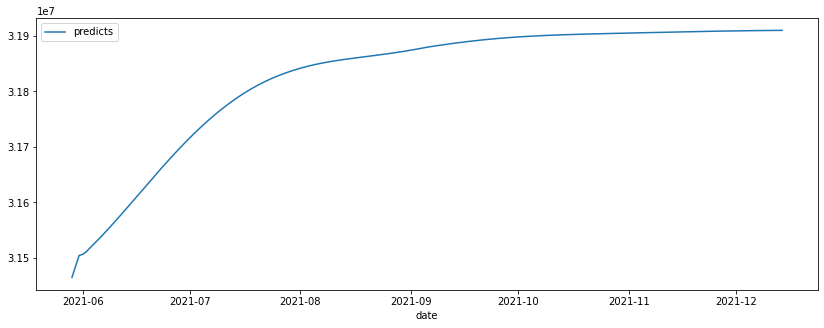

In [144]:
plt.figure(figsize=(14,5))

plt.plot(predicts, label='predicts')
plt.legend()
plt.xlabel('date')
plt.show()

In [130]:
model.save(r'C:\Users\mengh\plotly dash covid app\COVID-dashboard')

INFO:tensorflow:Assets written to: C:\Users\mengh\plotly dash covid app\COVID-dashboard\assets


INFO:tensorflow:Assets written to: C:\Users\mengh\plotly dash covid app\COVID-dashboard\assets


In [6]:
model = keras.models.load_model('.')

In [29]:
predicted_data.to_csv(r'C:\Users\mengh\plotly dash covid app\COVID-dashboard\predicted_data.csv')

In [30]:
realdata.to_csv(r'C:\Users\mengh\plotly dash covid app\COVID-dashboard\realdata.csv')